<a href="https://colab.research.google.com/github/JiveshDhakate/Machine-Learning/blob/main/Practical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Source of Dataset: Kaggle

#Datafile uploaded Colab
df = pd.read_csv("/content/Iris.csv")

df.info()#Dataset Name Iris Species 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [2]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Divide the dataset into attributes and labels
x=df.iloc[:,:4].values #Attributes
y=df['Species'].values #Label

In [16]:
#Creating Traing and Testing Splits
#Splitting the data into 75% train data and 25% test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size=0.3,random_state=100)

In [17]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=100)

In [18]:
y_predict = clf.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_predict))
print('Confusion Matrix')
print(confusion_matrix(y_test,y_predict))
print ("Accuracy : ", accuracy_score(y_test, y_predict))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        18

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion Matrix
[[16  0  0]
 [ 0 11  0]
 [ 0  0 18]]
Accuracy :  1.0


[Text(0.4, 0.8333333333333334, 'X[0] <= 50.5\ngini = 0.664\nsamples = 105\nvalue = [34, 39, 32]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.0\ngini = 0.495\nsamples = 71\nvalue = [0, 39, 32]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]')]

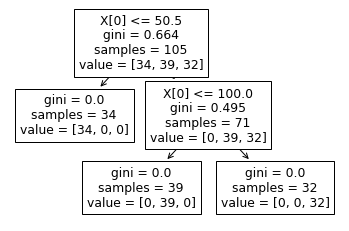

In [20]:
from sklearn import tree
tree.plot_tree(clf)

In [21]:
text_representation=tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 50.50
|   |--- class: Iris-setosa
|--- feature_0 >  50.50
|   |--- feature_0 <= 100.00
|   |   |--- class: Iris-versicolor
|   |--- feature_0 >  100.00
|   |   |--- class: Iris-virginica

